In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [69]:
# https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset
data = pd.read_csv('./EDAdata/data.csv')

data
# 각 행은 보스턴 지역의 주택 정보

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
506  0.98765   0.0  12.50     0  0.561  6.980  89.0  2.0980    3  320   
507  0.23456   0.0  12.50     0  0.561  6.980  76.0  2.6540    3  320   
508  0.44433   0.0  12.50     0  0.561  6.123  98.0  2.9870    3  320   
509  0.77763   0.0  12.70     0  0.561  6.222  34.0  2.5430    3  329   
510  0.65432   0.0  12.80     0  0.561  6.760  67.0  2.9870    3  345   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
506     23.0  396.00  12.00  12.0  
507     23.0  343.00  25.00  32.0  
508     23.0  343.00  21.00  54.0  
509     23.0  343.00  76.00  67.0  
510     23.0  321.00  45.00  24.0  

[511 rows x 14 columns]

### 데이터 전처리

In [70]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [71]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [72]:
data[data.isnull().any(axis=1)]

CRIM    ZN  INDUS  CHAS    NOX  RM   AGE     DIS  RAD  TAX  PTRATIO  \
10   0.22489  12.5   7.87     0  0.524 NaN  94.3  6.3467    5  311     15.2   
35   0.06417   0.0   5.96     0  0.499 NaN  68.2  3.3603    5  279     19.2   
63   0.12650  25.0   5.13     0  0.453 NaN  43.4  7.9809    8  284     19.7   
96   0.11504   0.0   2.89     0  0.445 NaN  69.6  3.4952    2  276     18.0   
135  0.55778   0.0  21.89     0  0.624 NaN  98.2  2.1107    4  437     21.2   

          B  LSTAT  MEDV  
10   392.52  20.45  15.0  
35   396.90   9.68  18.9  
63   395.58   9.50  25.0  
96   391.83  11.34  21.4  
135  394.67  16.96  18.1

In [73]:
data = data.dropna(axis=0) # 결측치있는 행 삭제

In [74]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 변수의 의미

- CRIM : 지역의 범죄율
- ZN : 지역에서 25,000 평방 피트가 넘는 주택지 비율
- INDUS : 지역에서 상업적으로 사용되지 않는 농지 면적
- CHAS : 지역이 Charles 강과 접하고 있으면 1, 아니면 0
- NOX : 지역의 산화질소 농도
- RM : 가구당 평균 방 수
- AGE : 1940년 이전에 지어진 주택 비율
- DIS : 5개의 보스턴 고용 센터와의 거리에 따른 가중치
- RAD : Radial 고속도로 접근성 지수
- TAX : 1만 달러당 재산세
- PTRATIO : 지역의 학생수와 교사수의 비율
- B : 지역의 흑인 지수 $1000(Bk - 0.63)^2$ | 여기서 지역별 Bk는 흑인의 비율
- LSTAT : 지역의 빈곤층 비율
- MEDV : 자가 소유자의 주택 중앙값(중위값)을 천 달러 단위로 나타낸 것

### 분석해볼만한거

- 강과 재산세 혹은 주택의 중앙값
- 고속도로 접근성과 주택가격
- 지역 범죄율과 주택 가격  
...

In [75]:
data.describe() # 수치형 데이터 요약

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.617404   11.289526   11.174842    0.069170    0.555209    6.287589   
std      8.600123   23.325350    6.824592    0.253994    0.115611    0.703802   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082268    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.266005    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.629750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.555731    3.775231    9.531621  408.330040   18.498419  356.228379   
std     28.161573    2.096147    8.716661  168.382685    2.202078   91.253462   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.098500    4.000000  280.250000   17.400000  374.687500   
50%     77.500000    3.122200    5.000000  330.000000   19.100000  391.260000   
75%     93.975000    5.117675   24.000000  666.000000   20.200000  396.210000   
max    100.000000   12.126500   24.000000  711.000000   23.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.872569   22.711858  
std      7.823528    9.520520  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.465000   21.200000  
75%     17.107500   25.075000  
max     76.000000   67.000000

### 수치형 데이터 요약

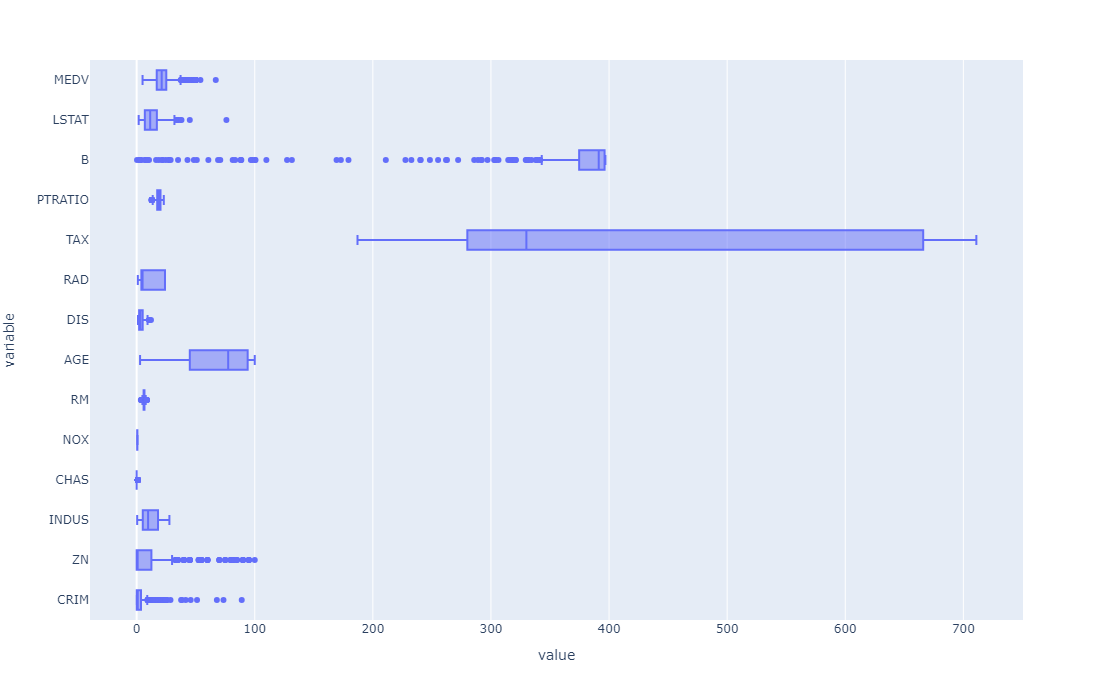

In [77]:
# 수치형 데이터 요약 그래프
data_melted = data.melt(var_name='variable', value_name='value')

fig = px.box(data_melted, x='value', y='variable', width=1200, height=700)

fig.show()

In [78]:
data1 = data[['INDUS', 'RM', 'DIS', 'PTRATIO']]
data2 = data[['CRIM', 'ZN', 'RAD', 'LSTAT', 'MEDV']]

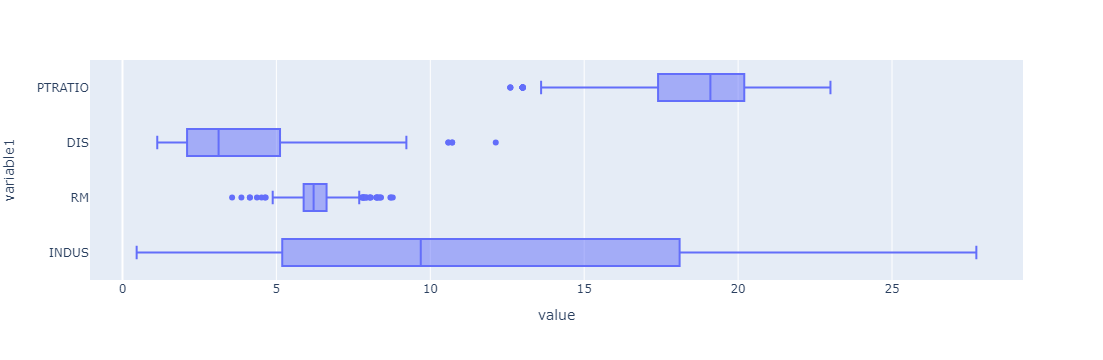

In [79]:
# 수치형 데이터 요약 그래프1
d1_melted = data1.melt(var_name='variable1', value_name='value')
fig = px.box(d1_melted, x='value', y='variable1')
fig.show()

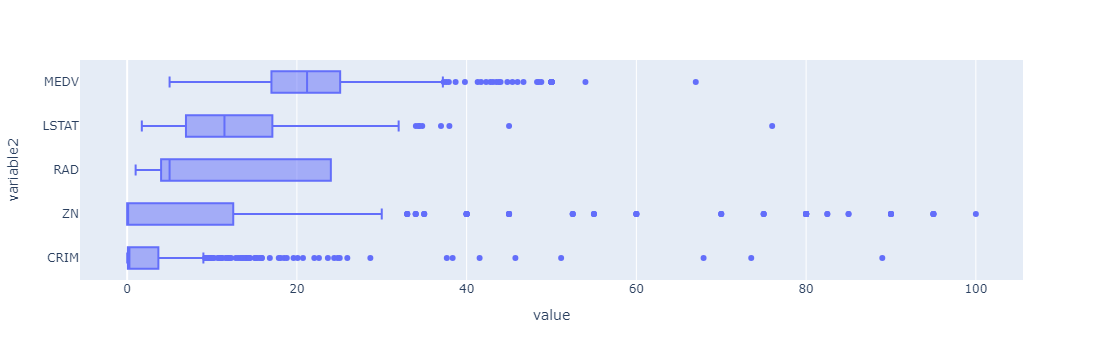

In [80]:
# 수치형 데이터 요약 그래프2
d2_melted = data2.melt(var_name='variable2', value_name='value')
fig = px.box(d2_melted, x='value', y='variable2')
fig.show()

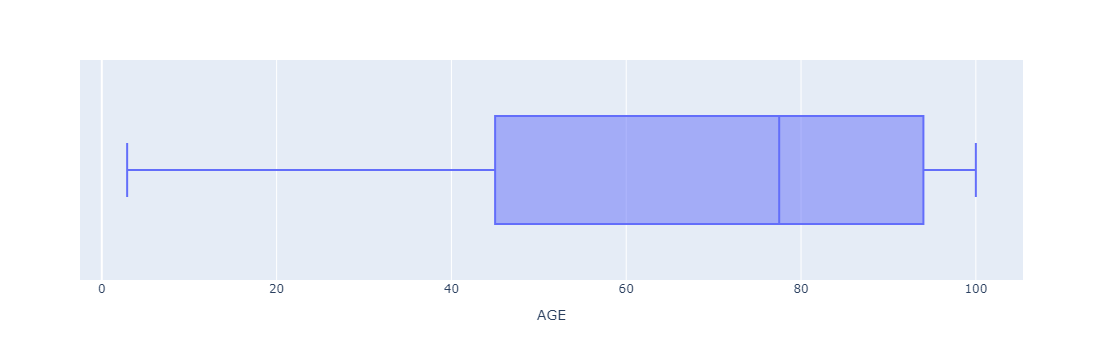

In [81]:
fig = px.box(data, x='AGE')
fig.show()

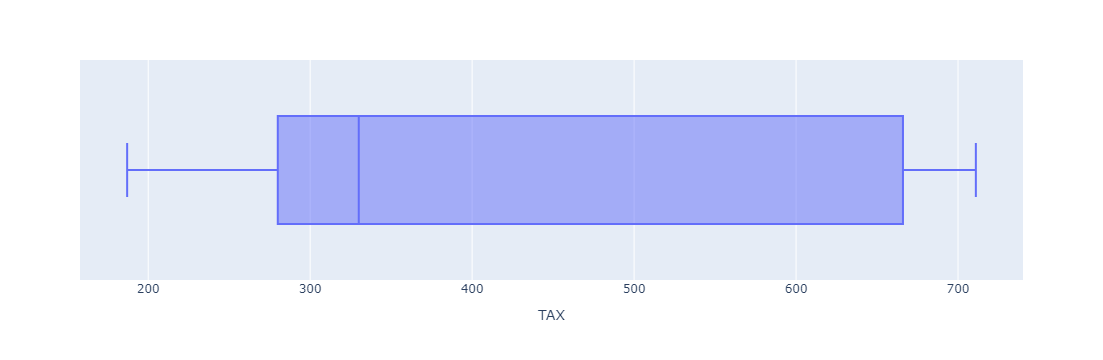

In [82]:
fig = px.box(data, x='TAX')
fig.show()

In [83]:
data.corr()#상관계수

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199418  0.406479 -0.056024  0.420170 -0.220363  0.352817   
ZN      -0.199418  1.000000 -0.536888 -0.041824 -0.517737  0.307812 -0.567952   
INDUS    0.406479 -0.536888  1.000000  0.061746  0.762864 -0.392193  0.644182   
CHAS    -0.056024 -0.041824  0.061746  1.000000  0.090200  0.089952  0.086664   
NOX      0.420170 -0.517737  0.762864  0.090200  1.000000 -0.301778  0.730640   
RM      -0.220363  0.307812 -0.392193  0.089952 -0.301778  1.000000 -0.237335   
AGE      0.352817 -0.567952  0.644182  0.086664  0.730640 -0.237335  1.000000   
DIS     -0.377904  0.666410 -0.709589 -0.097049 -0.770167  0.199853 -0.748698   
RAD      0.625407 -0.309652  0.594344 -0.006803  0.609839 -0.213078  0.456212   
TAX      0.582884 -0.312901  0.718784 -0.035770  0.665914 -0.293969  0.505186   
PTRATIO  0.278265 -0.394101  0.378739 -0.124780  0.185864 -0.339755  0.261170   
B       -0.383363  0.176625 -0.357787  0.050143 -0.379523  0.127888 -0.273739   
LSTAT    0.406266 -0.390730  0.558093 -0.056881  0.540542 -0.553126  0.528674   
MEDV    -0.381994  0.339327 -0.466094  0.164175 -0.412974  0.667695 -0.366717   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.377904  0.625407  0.582884  0.278265 -0.383363  0.406266 -0.381994  
ZN       0.666410 -0.309652 -0.312901 -0.394101  0.176625 -0.390730  0.339327  
INDUS   -0.709589  0.594344  0.718784  0.378739 -0.357787  0.558093 -0.466094  
CHAS    -0.097049 -0.006803 -0.035770 -0.124780  0.050143 -0.056881  0.164175  
NOX     -0.770167  0.609839  0.665914  0.185864 -0.379523  0.540542 -0.412974  
RM       0.199853 -0.213078 -0.293969 -0.339755  0.127888 -0.553126  0.667695  
AGE     -0.748698  0.456212  0.505186  0.261170 -0.273739  0.528674 -0.366717  
DIS      1.000000 -0.491789 -0.530665 -0.237141  0.291309 -0.470697  0.235206  
RAD     -0.491789  1.000000  0.910898  0.441336 -0.441338  0.424516 -0.382068  
TAX     -0.530665  0.910898  1.000000  0.442510 -0.439917  0.483227 -0.461959  
PTRATIO -0.237141  0.441336  0.442510  1.000000 -0.176542  0.397760 -0.451117  
B        0.291309 -0.441338 -0.439917 -0.176542  1.000000 -0.341055  0.319851  
LSTAT   -0.470697  0.424516  0.483227  0.397760 -0.341055  1.000000 -0.562599  
MEDV     0.235206 -0.382068 -0.461959 -0.451117  0.319851 -0.562599  1.000000

### EDA
기본적으로 Y값은 집값(MEDV)로 잡고 X를 변형시켜가며 plot을 하되 scatterplot을 해 본 결과 X가 범주형 자료에 가까우면 KDEplot, boxplot등을 사용하고, 연속형 자료에 가까우면 scatterplot과 함께 중앙값으로 X를 분류한 후 KDEplot, boxplot을 해 범주형 자료의 KDEplot과도 비교할 수 있도록 한다.
(비례하는지 반비례하는지는 corr만 봐도 알 수 있으니 우리는 디테일하게 어떻게 분포되어있는지에 주목해야한다.)
#### (1) 범죄율-집값 (corr = -0.381994)

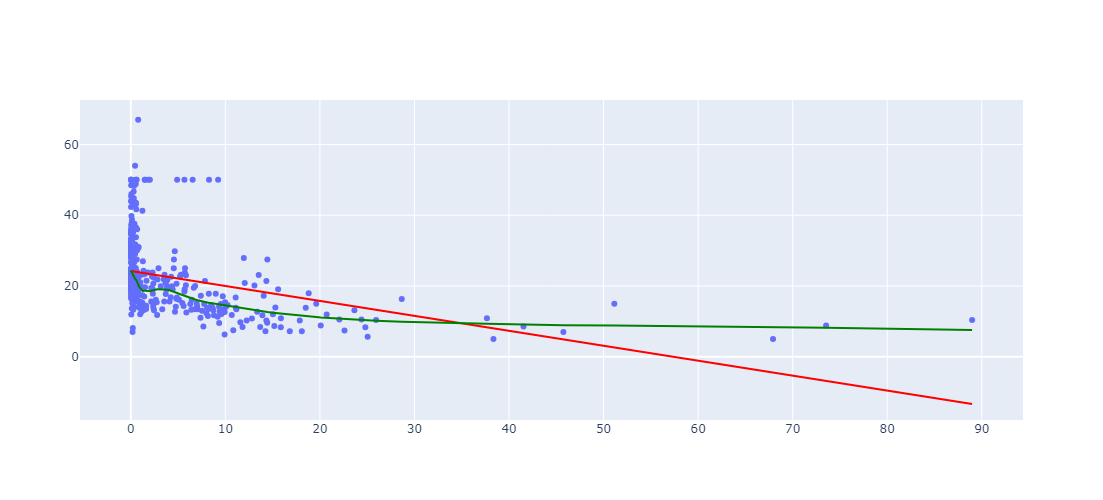

In [91]:
#범죄율의 집값에 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='CRIM', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='CRIM', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

연속형 자료에 가깝다. -> kdeplot

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



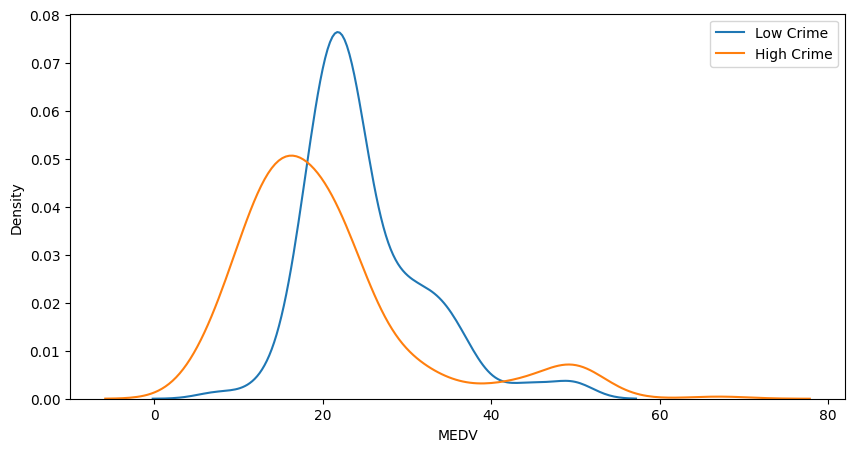

In [84]:
#범죄율의 집값에 대한 영향력 KDEplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['CRIM']<data['CRIM'].median()]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['CRIM']>=data['CRIM'].median()]['MEDV'], ax=ax)
plt.legend(['Low Crime', 'High Crime'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\1078864671.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



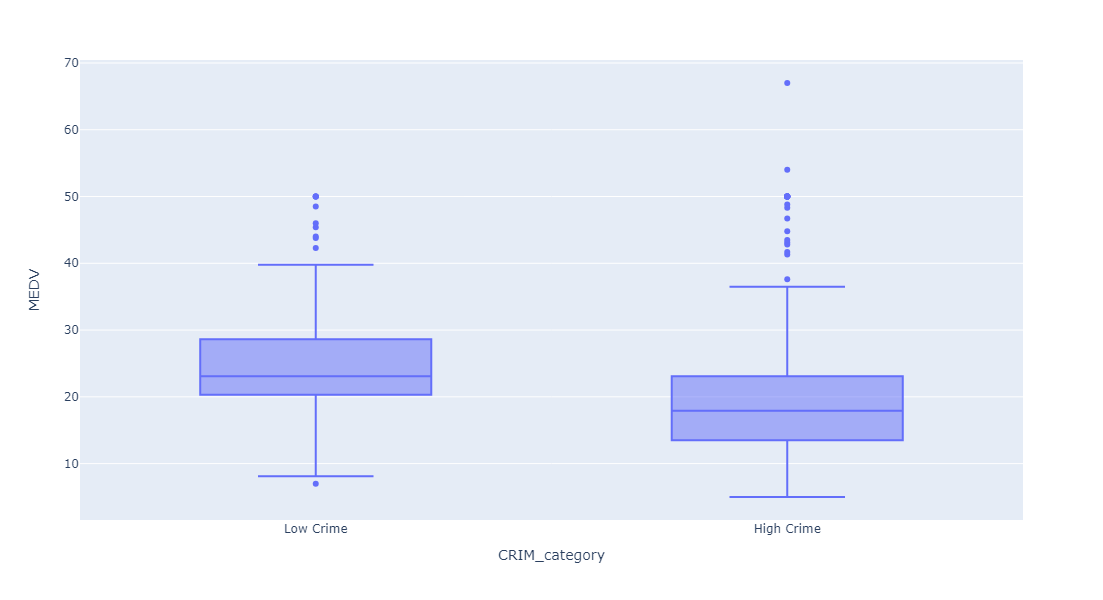

In [102]:
#범죄율의 집값에 대한 영향력 boxplot
data['CRIM_category'] = data['CRIM'].apply(lambda x: 'Low Crime' if x < data['CRIM'].median() else 'High Crime')
fig = px.box(data, x='CRIM_category', y='MEDV', width=400, height=600)
fig.show()

#### (2) 지역 25000 평방피트 이상 주택 비율-집값(corr=0.339327)

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning:

divide by zero encountered in divide

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in divide



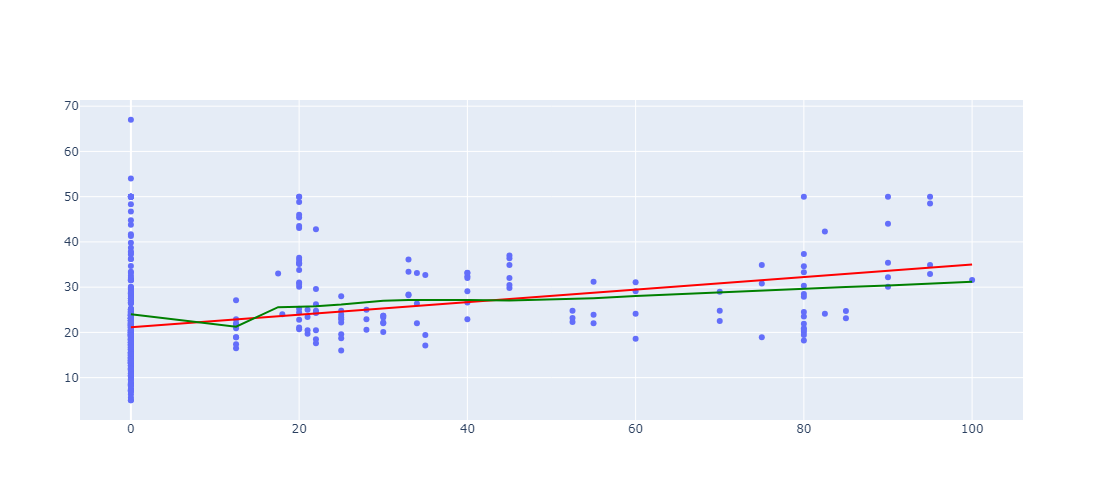

In [92]:
# 25000평방피트 이상 주택 비율의 집값에 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='ZN', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='ZN', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

범주형 자료에 가깝다 -> 0인것과 아닌 것으로 kdeplot, heatmap, boxplot

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



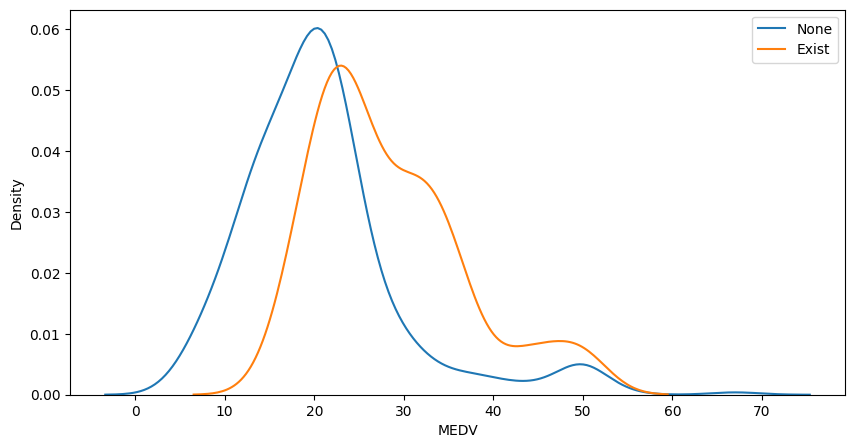

In [86]:
# 25000평방피트 이상 주택 비율의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['ZN']==0]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['ZN'] > 0]['MEDV'], ax=ax)
plt.legend(['None', 'Exist'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\2528631190.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



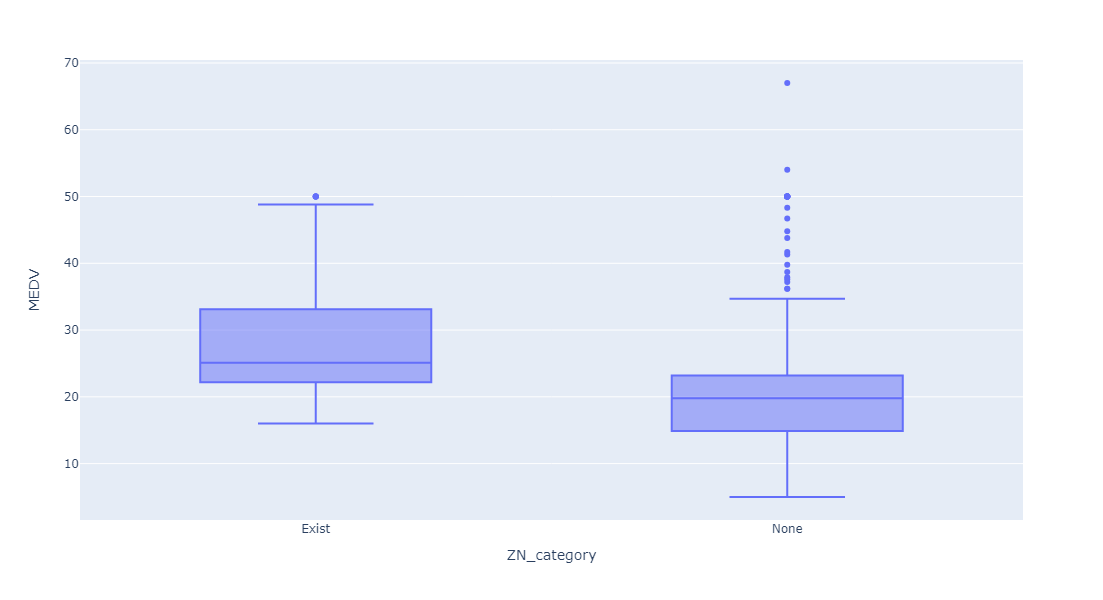

In [99]:
# 25000평방피트 이상 주택 비율의 집값에 대한 영향력 boxplot
data['ZN_category'] = data['ZN'].apply(lambda x: 'None' if x == 0 else 'Exist')
fig = px.box(data, x='ZN_category', y='MEDV', width=400, height=600)
fig.show()

#### (3) 비사용 농지 면적-집값(corr=-0.466094)

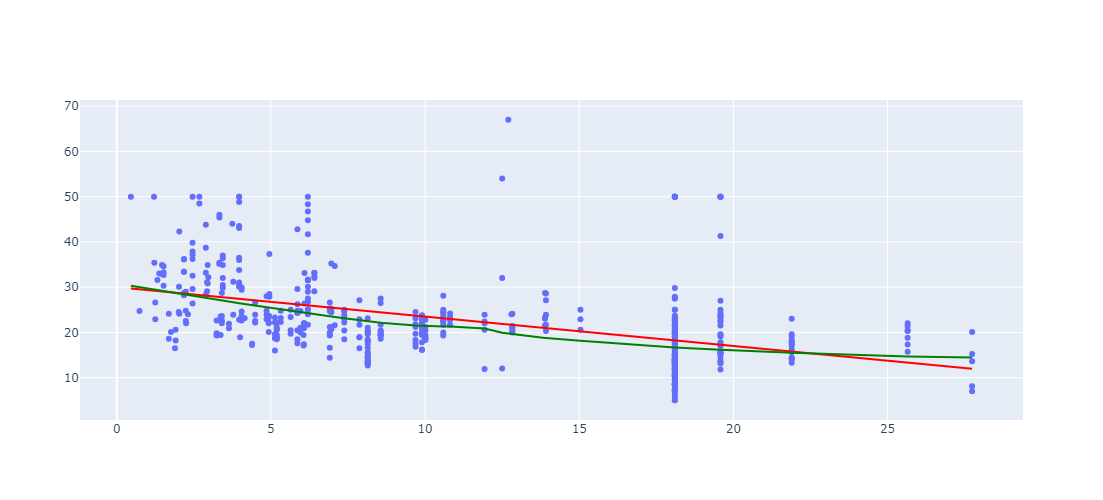

In [90]:
#비사용 농지 면적의 집값에 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='INDUS', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='INDUS', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

범주형 자료에 가깝다. -> 16 이하인지 아닌지 기준으로 kdeplot, heatmap, boxplot

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



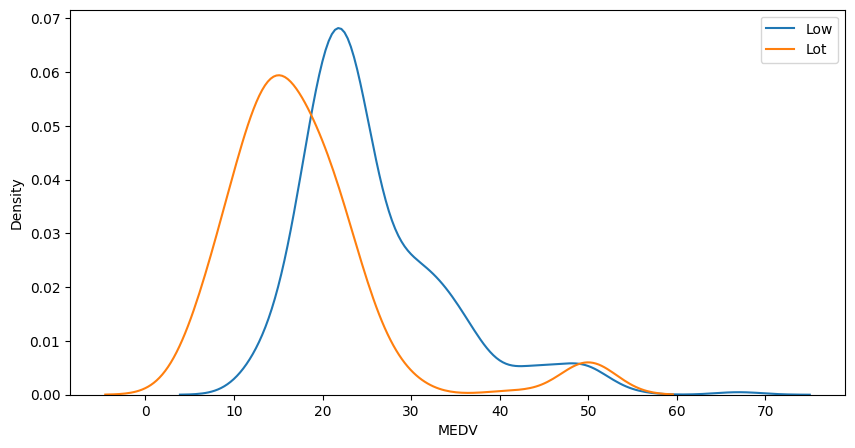

In [93]:
#비사용 농지 면적의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['INDUS'] < 16]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['INDUS'] >= 16]['MEDV'], ax=ax)
plt.legend(['Low', 'Lot'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\2178766746.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



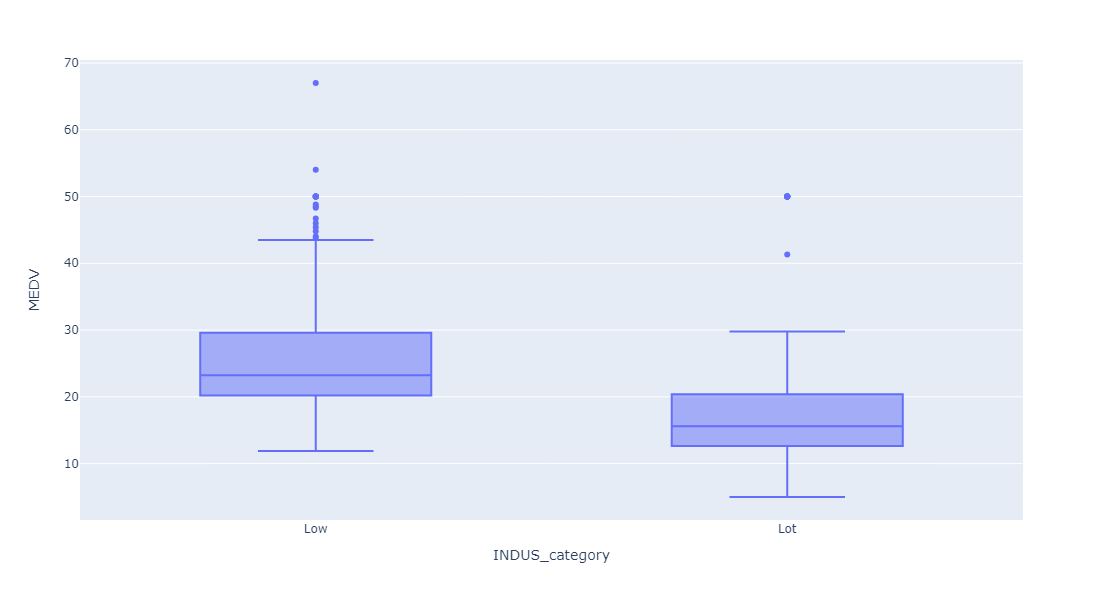

In [96]:
#비사용 농지 면적의 집값에 대한 영향력 boxplot
data['INDUS_category'] = data['INDUS'].apply(lambda x: 'Low' if x < 16 else 'Lot')
fig = px.box(data, x='INDUS_category', y='MEDV', width=400, height=600)
fig.show()

#### (4) 찰스강-집값 (corr=0.164175)
명백한 범주형 자료이므로 scatterplot 생략

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



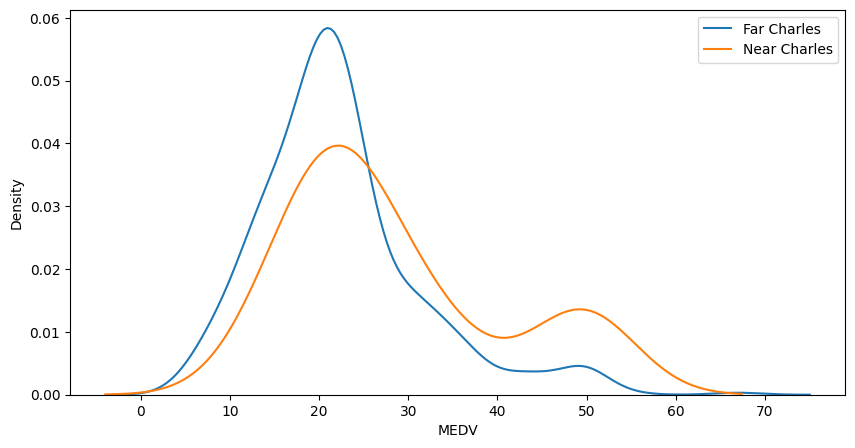

In [48]:
#찰스강의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['CHAS']==0]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['CHAS']==1]['MEDV'], ax=ax)
plt.legend(['Far Charles', 'Near Charles'])
plt.show()

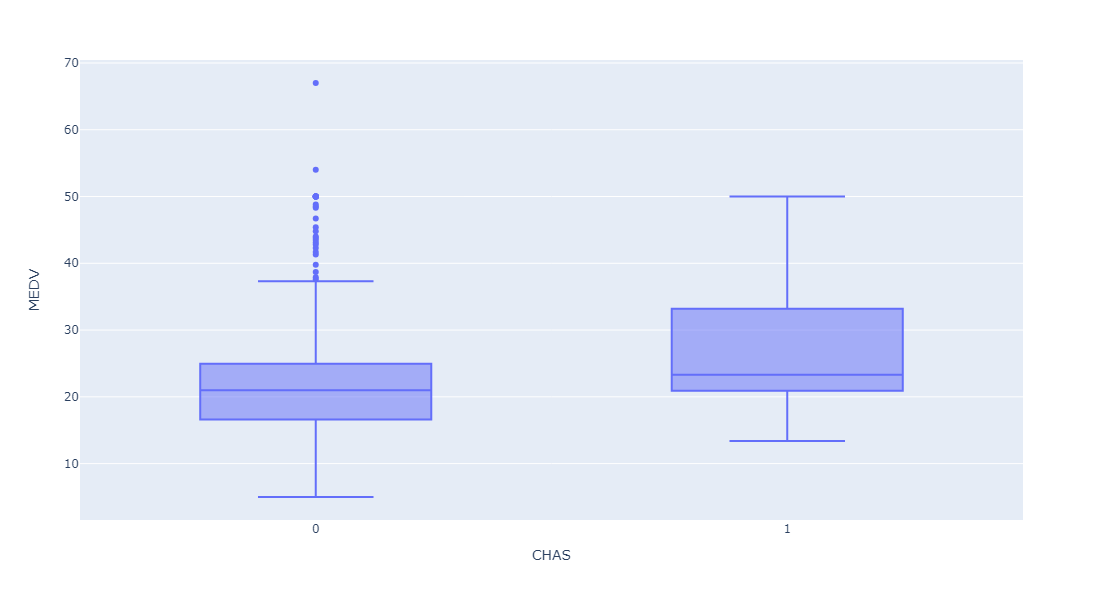

In [50]:
# 찰스강의 잡값에 대한 영향력 boxplot
fig = px.box(data, x='CHAS', y='MEDV', width=400, height=600)
fig.show()
# 강과 인접해있는 지역이 평균 주택가격이 높음

#### (5) 산화질소 농도-집값 (corr=-0.412974)

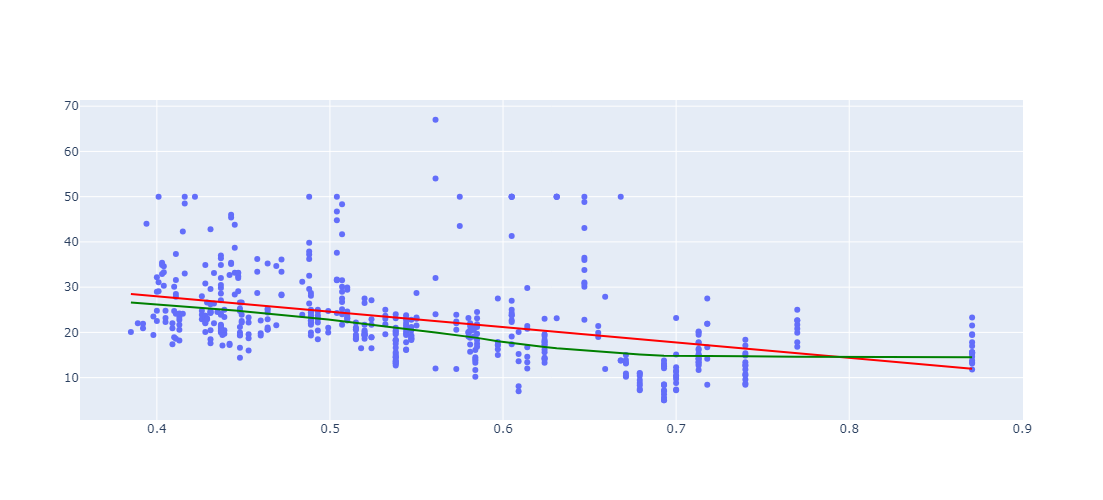

In [104]:
# 산화질소 농도의 집값에 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='NOX', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='NOX', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



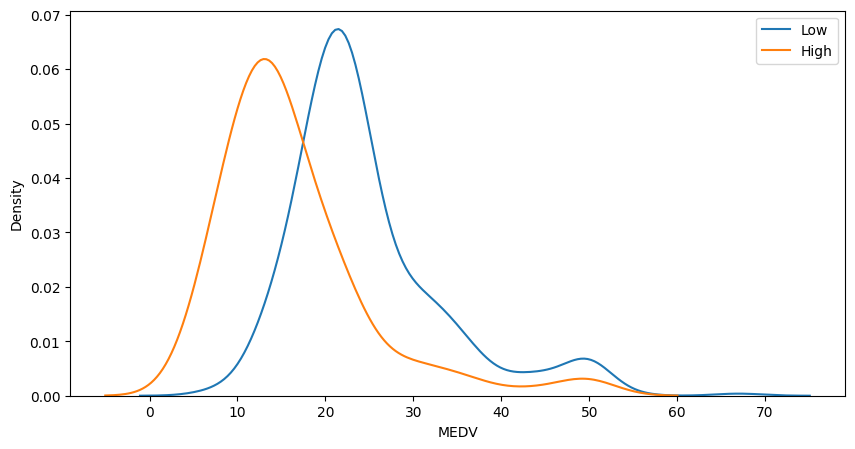

In [106]:
# 산화질소 농도의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['NOX']<0.64]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['NOX']>=0.64]['MEDV'], ax=ax)
plt.legend(['Low', 'High'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\651764369.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



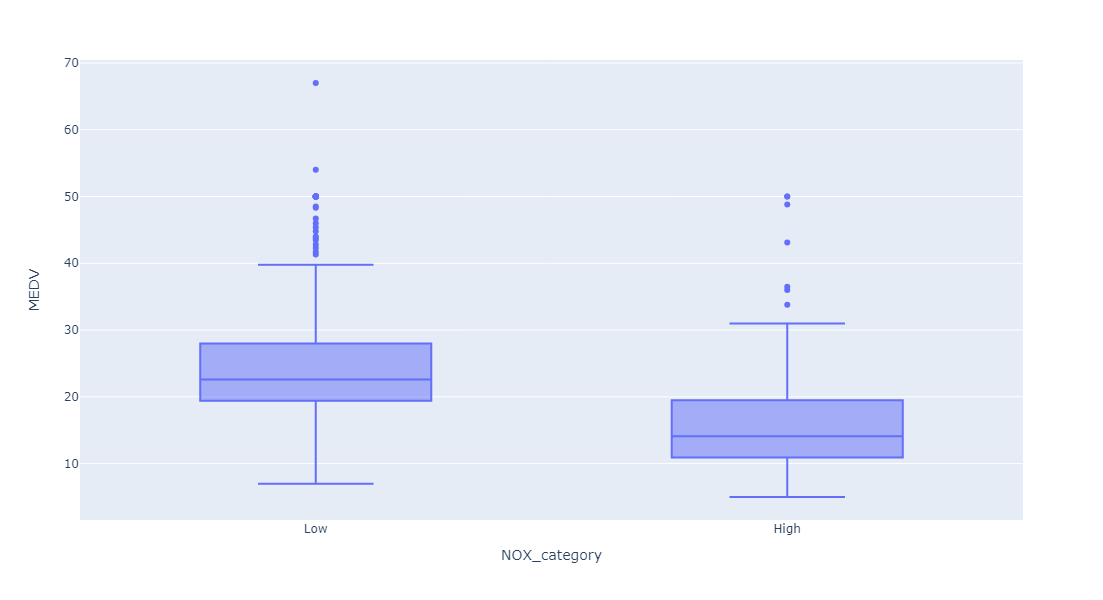

In [109]:
# 산화질소 농도의 집값에 대한 영향력 boxplot
data['NOX_category'] = data['NOX'].apply(lambda x: 'Low' if x < 0.64 else 'High')
fig = px.box(data, x='NOX_category', y='MEDV', width=400, height=600)
fig.show()

#### (6) 방 수-집값 (corr=0.667695)

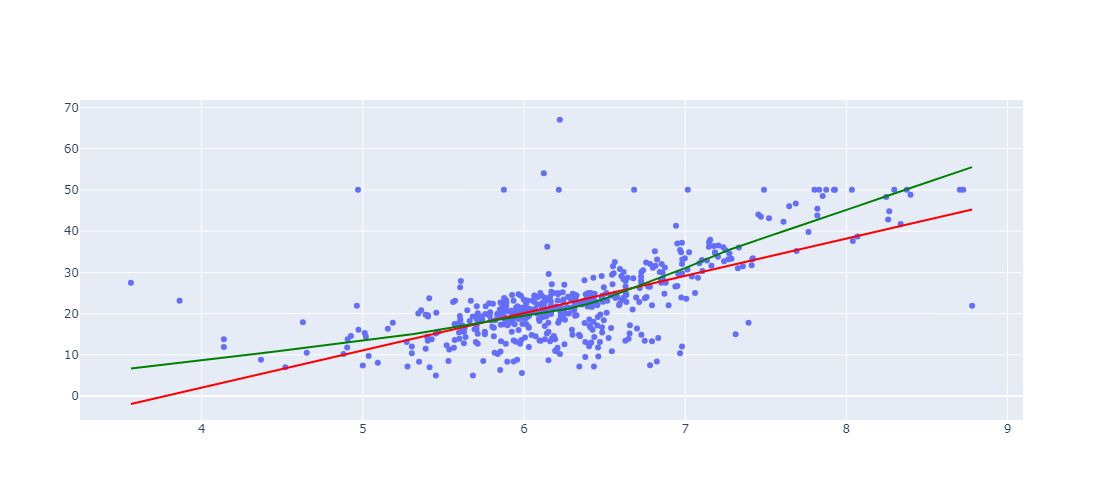

In [100]:
# 방 수의 집값에 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='RM', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='RM', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

연속형 자료 -> kdeplot

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



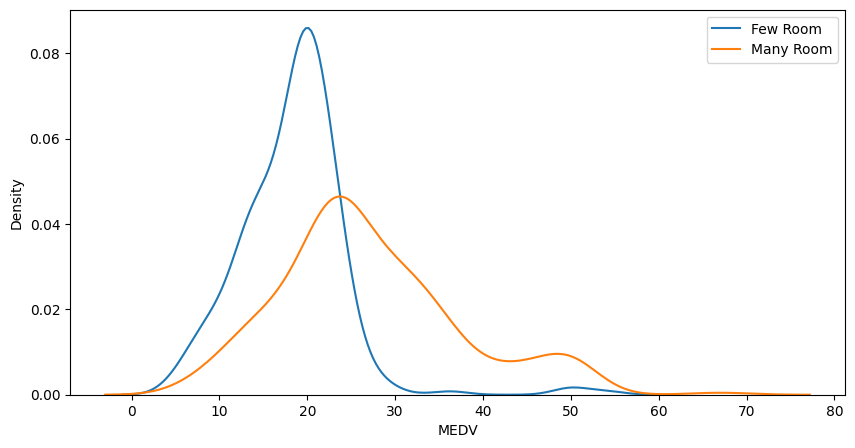

In [51]:
#방 수의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['RM']<data['RM'].median()]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['RM']>=data['RM'].median()]['MEDV'], ax=ax)
plt.legend(['Few Room', 'Many Room'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\2230469704.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



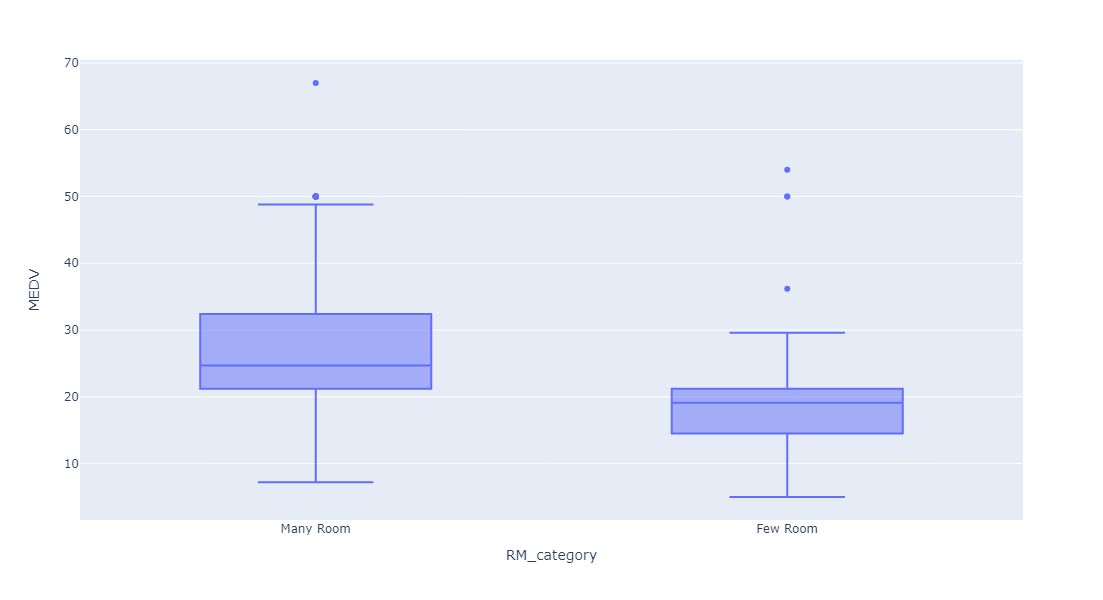

In [103]:
#방 수의 집값에 대한 영향력 boxplot
data['RM_category'] = data['RM'].apply(lambda x: 'Few Room' if x < data['RM'].median() else 'Many Room')
fig = px.box(data, x='RM_category', y='MEDV', width=400, height=600)
fig.show()

### 7. 1940년 이전 주택 비율-집값(corr=-0.366717)

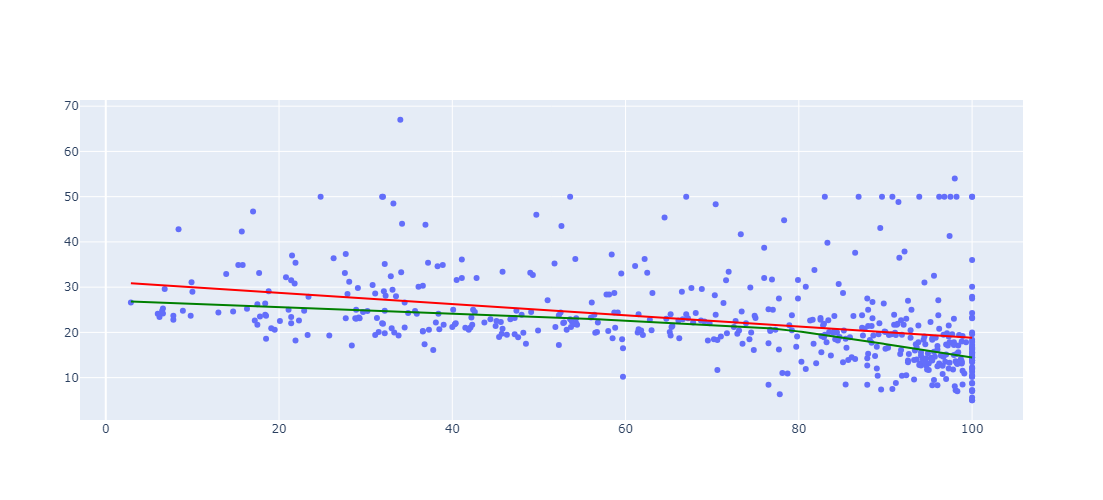

In [110]:
# 1940년 이전 주택 비율의 집값 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='AGE', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='AGE', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

연속형 자료

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



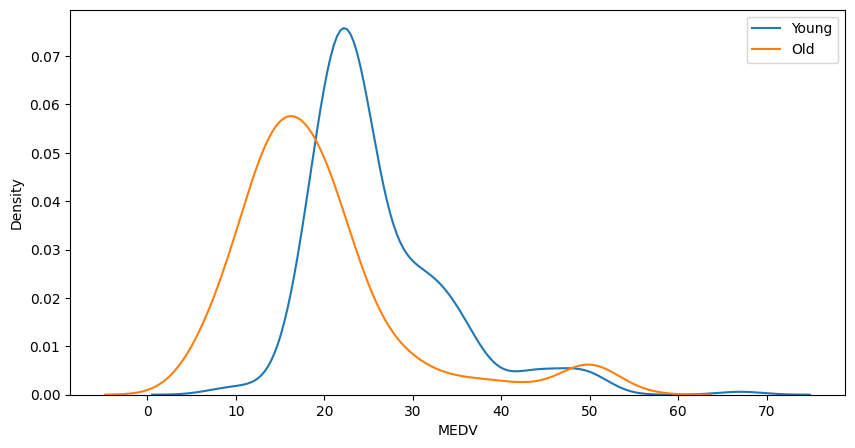

In [111]:
#1940년 이전 주택 비율의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['AGE']<data['AGE'].median()]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['AGE']>=data['AGE'].median()]['MEDV'], ax=ax)
plt.legend(['Young', 'Old'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\2112620897.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



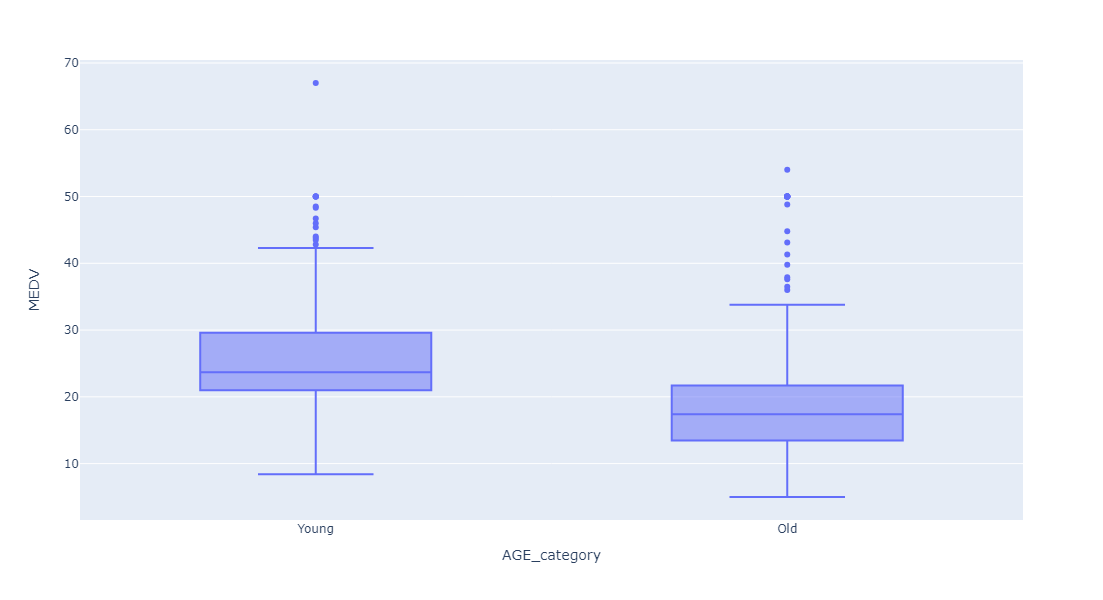

In [112]:
#1940년 이전 주택 비율의 집값에 대한 영향력 boxplot
data['AGE_category'] = data['AGE'].apply(lambda x: 'Young' if x < data['AGE'].median() else 'Old')
fig = px.box(data, x='AGE_category', y='MEDV', width=400, height=600)
fig.show()

#### 8. 고용 센터와의 거리-집값(corr=0.235206)

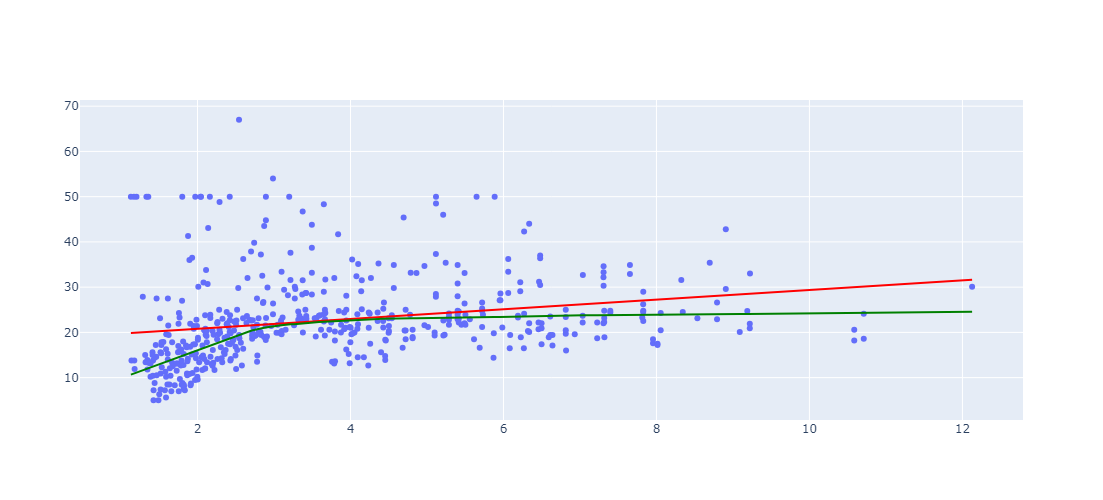

In [113]:
# 고용 센터와 거리의 집값에 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='DIS', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='DIS', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

연속형 자료

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



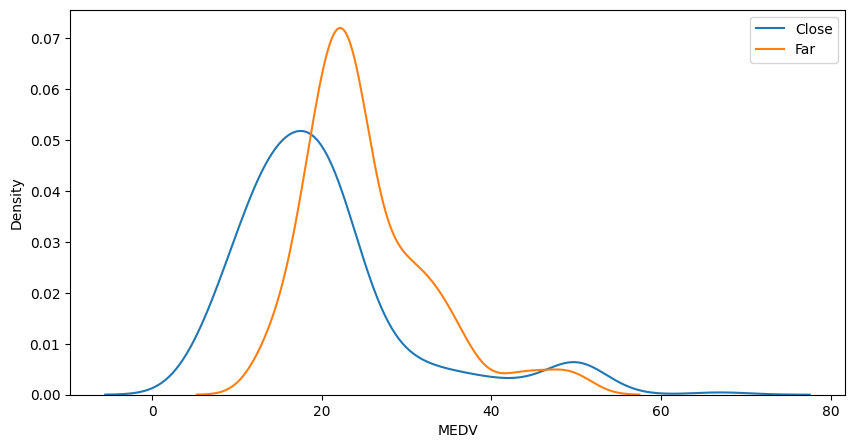

In [115]:
# 고용 센터와 거리의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['DIS']<data['DIS'].median()]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['DIS']>=data['DIS'].median()]['MEDV'], ax=ax)
plt.legend(['Close', 'Far'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\3288348625.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



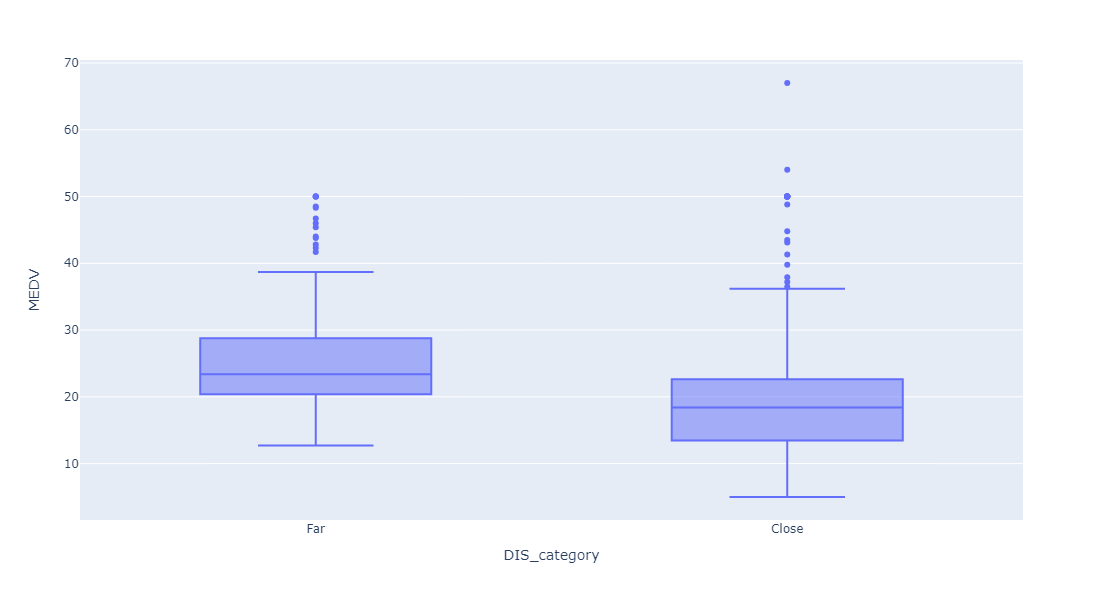

In [116]:
# 고용 센터와 거리의 집값에 대한 영향력 boxplot
data['DIS_category'] = data['DIS'].apply(lambda x: 'Close' if x < data['DIS'].median() else 'Far')
fig = px.box(data, x='DIS_category', y='MEDV', width=400, height=600)
fig.show()

#### 9. 고속도로 접근성-집값(corr=-0.382068)

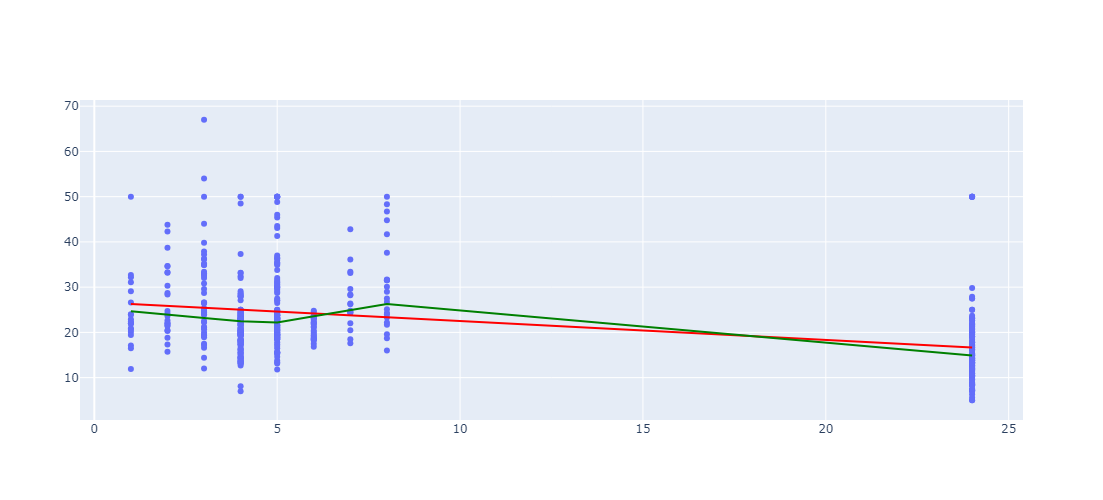

In [117]:
# 고속도로 접근성의 집값에 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='RAD', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='RAD', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

범주형 자료

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



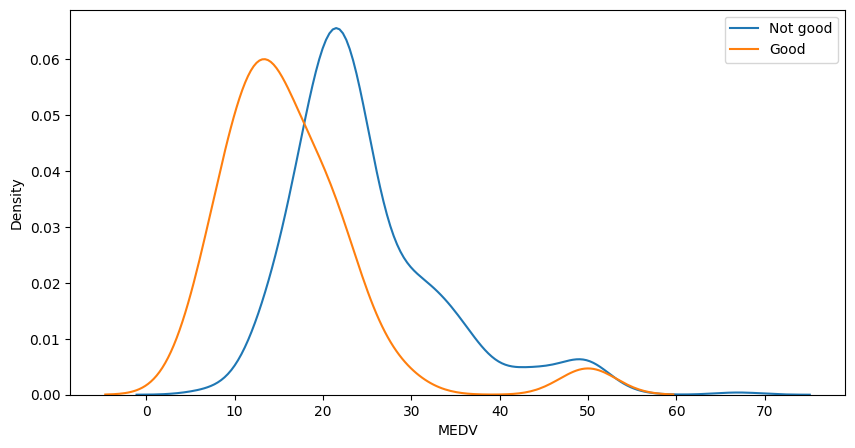

In [121]:
#고속도로 접근성의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['RAD']!=24]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['RAD']==24]['MEDV'], ax=ax)
plt.legend(['Not good', 'Good'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\96467789.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



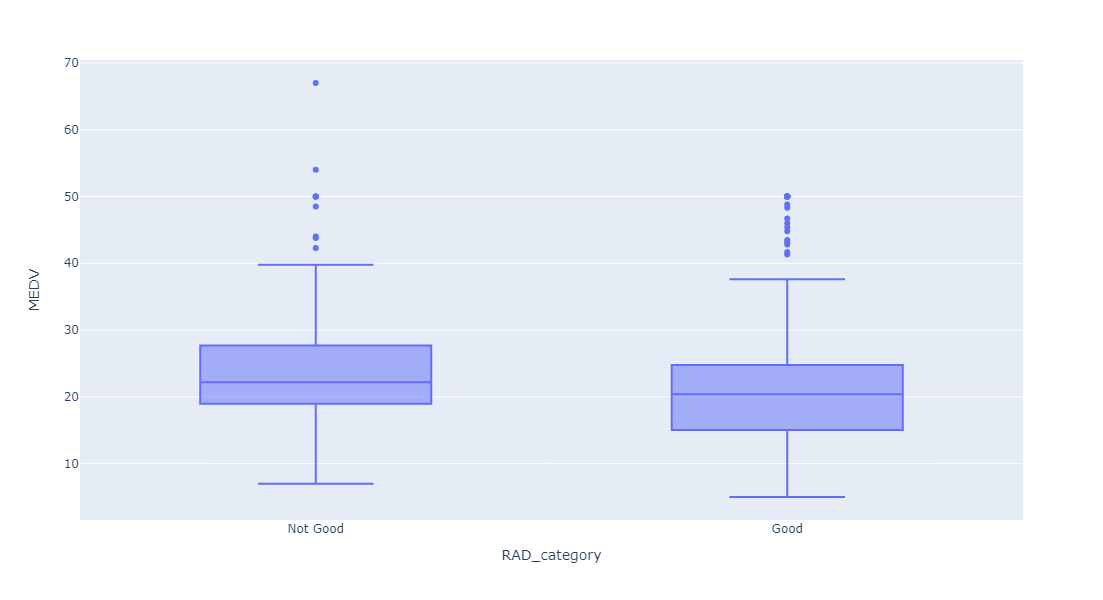

In [122]:
#고속도로 접근성의 집값에 대한 영향력 boxplot
data['RAD_category'] = data['RAD'].apply(lambda x: 'Not Good' if x < data['RAD'].median() else 'Good')
fig = px.box(data, x='RAD_category', y='MEDV', width=400, height=600)
fig.show()

#### 10. 1만달러당 재산세-집값(corr=-0.461959)

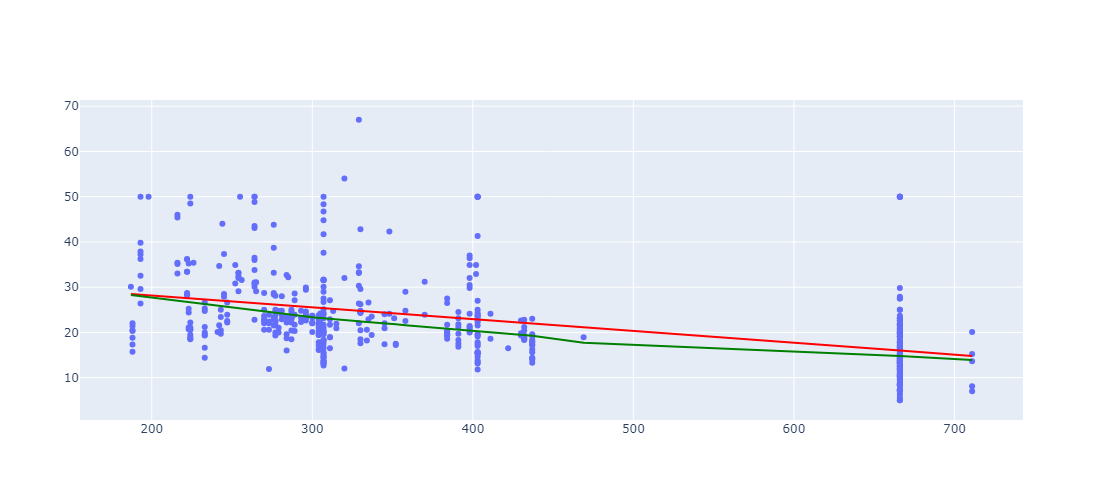

In [123]:
# 1만달러당 재산세의 집값에 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='TAX', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='TAX', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

범주형 자료

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



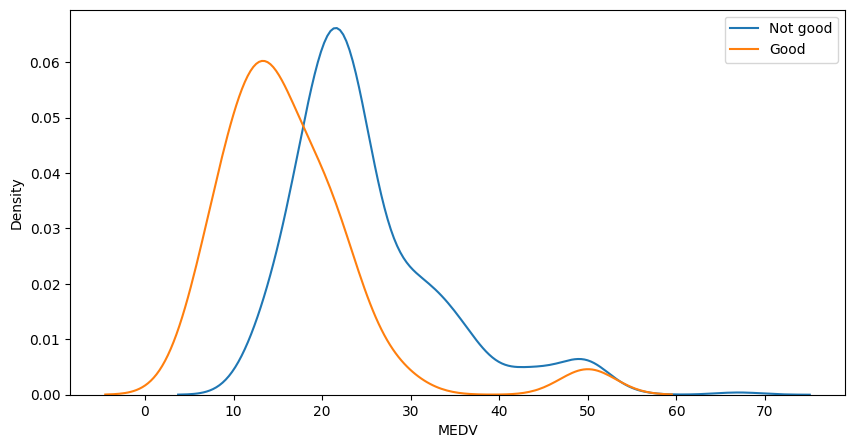

In [124]:
#1만달러당 재산세의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['TAX']<500]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['TAX']>=500]['MEDV'], ax=ax)
plt.legend(['Low', 'High'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\4068038847.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



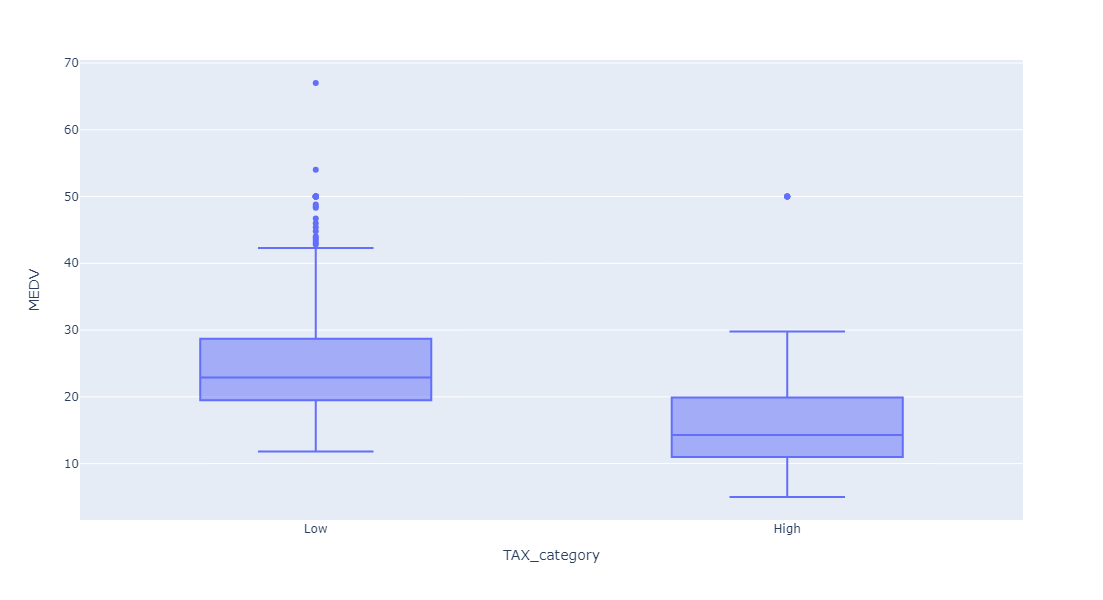

In [125]:
#1만달러당 재산세의 집값에 대한 영향력 boxplot
data['TAX_category'] = data['TAX'].apply(lambda x: 'Low' if x < 500 else 'High')
fig = px.box(data, x='TAX_category', y='MEDV', width=400, height=600)
fig.show()

#### 11. 학생교사비율-집값(corr=-0.451117)

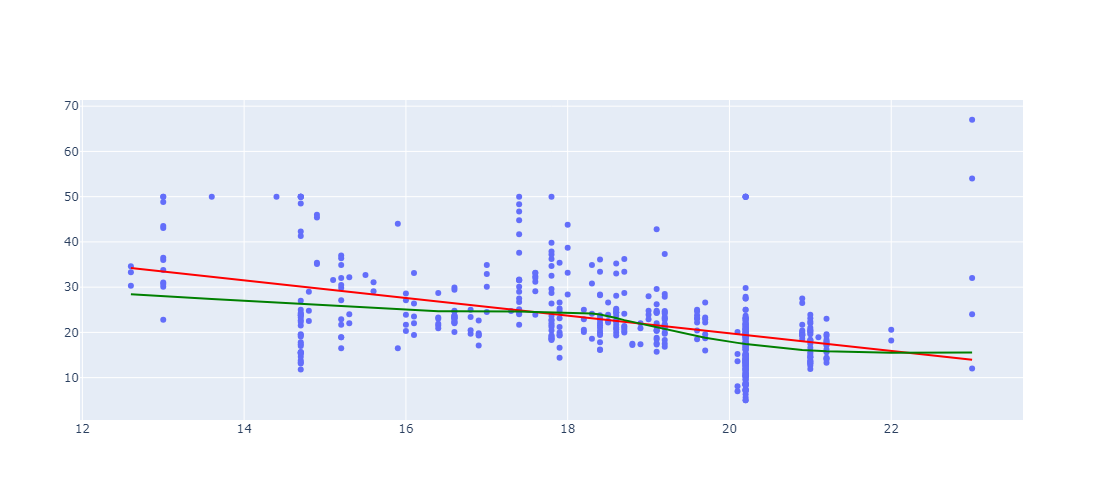

In [126]:
# 학생교사비율의 집값에 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='PTRATIO', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='PTRATIO', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

범주형 자료

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



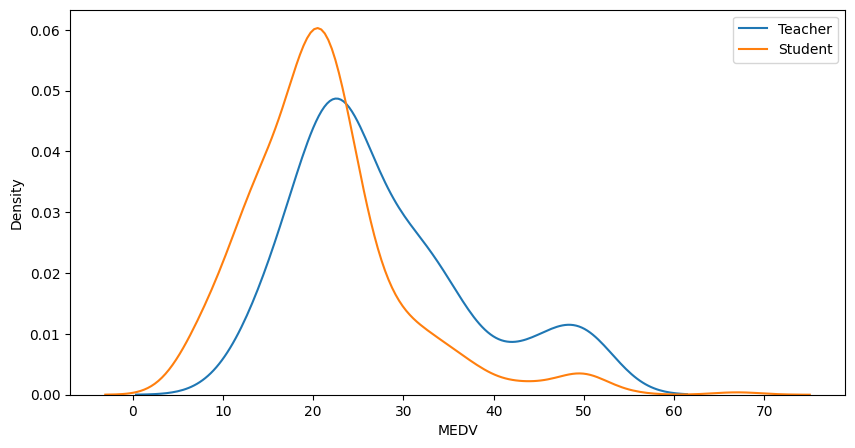

In [128]:
# 학생교사비율의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['PTRATIO']<=17]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['PTRATIO']>17]['MEDV'], ax=ax)
plt.legend(['Teacher', 'Student'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\691317770.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



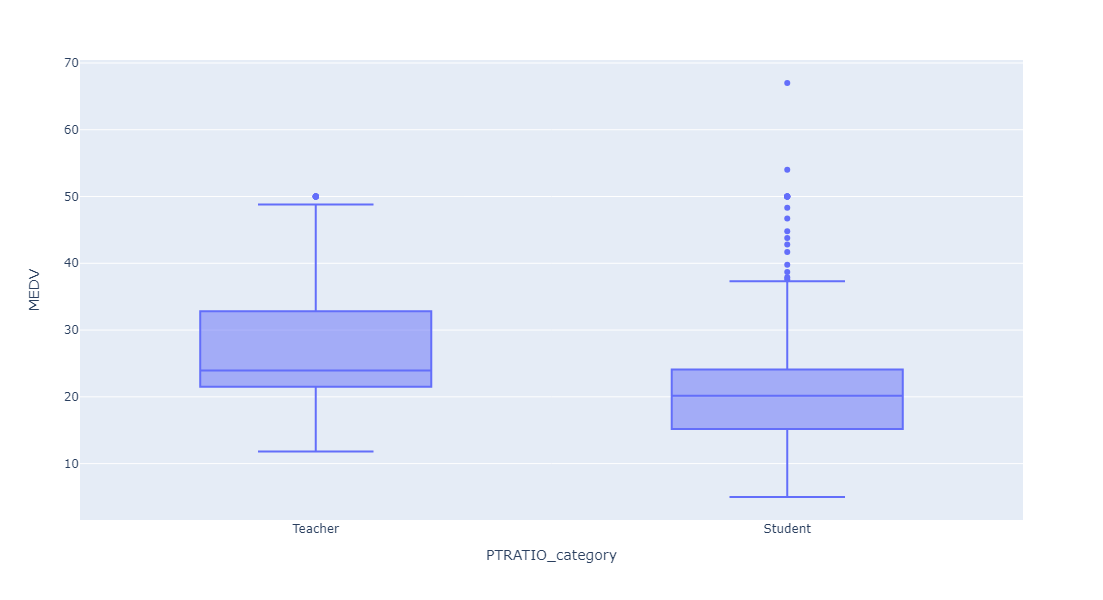

In [129]:
# 학생교사비율의 집값에 대한 영향력 boxplot
data['PTRATIO_category'] = data['PTRATIO'].apply(lambda x: 'Teacher' if x <= 17 else 'Student')
fig = px.box(data, x='PTRATIO_category', y='MEDV', width=400, height=600)
fig.show()

#### 12. 흑인 지수-집값(corr=0.319851)

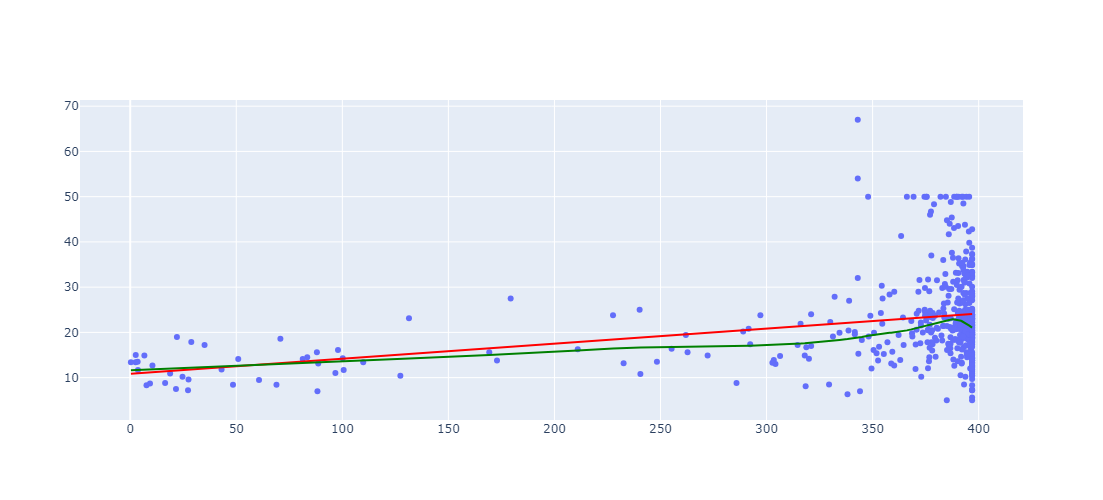

In [130]:
# 흑인 지수의 집값에 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='B', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='B', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

연속형 자료

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



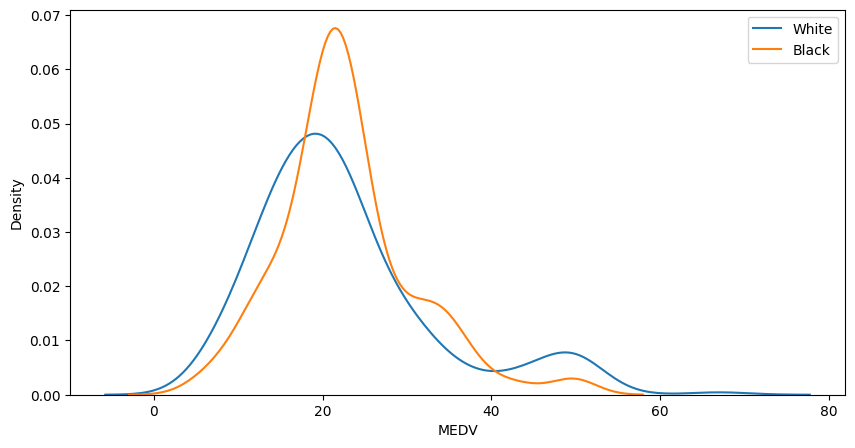

In [131]:
# 흑인 지수의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['B']<data['B'].median()]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['B']>=data['B'].median()]['MEDV'], ax=ax)
plt.legend(['White', 'Black'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\2978333491.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



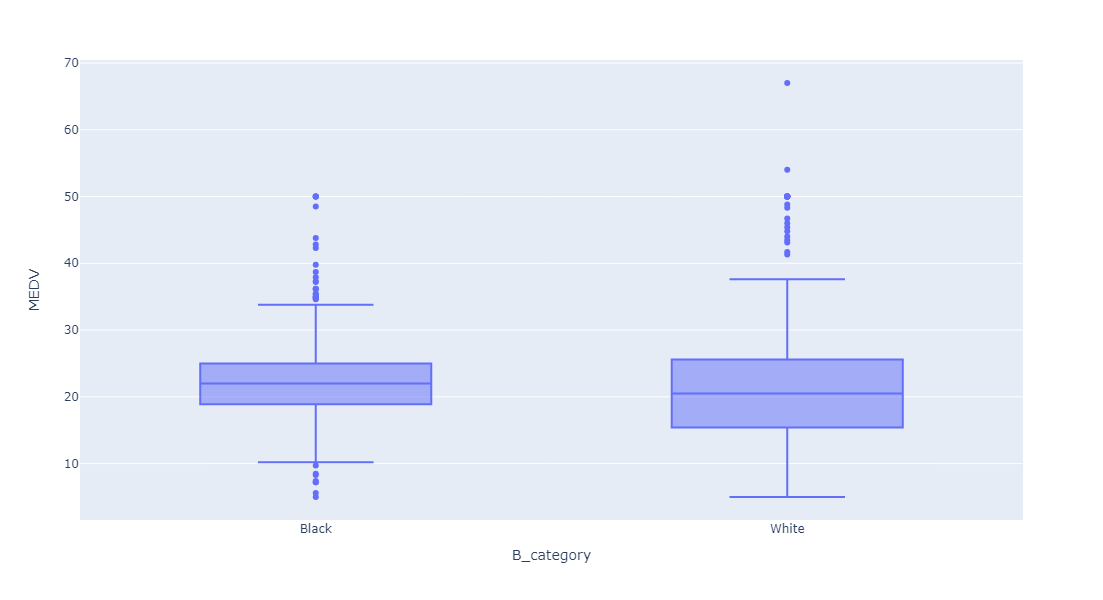

In [133]:
# 흑인 지수의 집값에 대한 영향력 boxplot
data['B_category'] = data['B'].apply(lambda x: 'White' if x < data['B'].median() else 'Black')
fig = px.box(data, x='B_category', y='MEDV', width=400, height=600)
fig.show()

#### 13. 지역 빈곤층 지수-집값(corr=-0.562599)

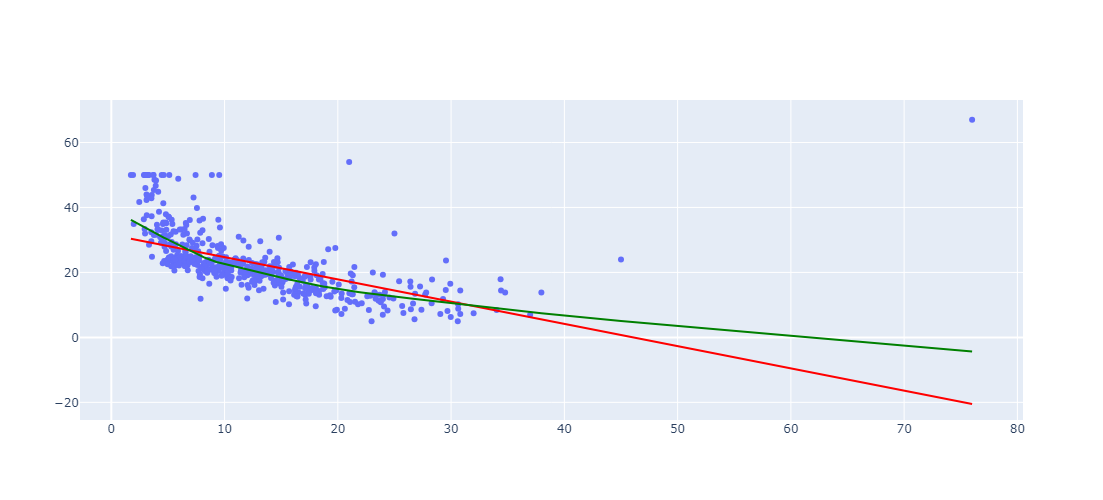

In [134]:
# 지역 빈곤층 지수의 집값에 대한 영향력 scatterplot
fig_ols = px.scatter(data, x='LSTAT', y='MEDV', trendline='ols')
fig_lowess = px.scatter(data, x='LSTAT', y='MEDV', trendline='lowess')

fig = go.Figure()
fig.add_traces(fig_ols.data)
fig.add_trace(fig_lowess.data[1])

fig.data[1].line.color = 'red'
fig.data[2].line.color = 'green'

fig.update_layout(width=700, height=500)

fig.show()

연속형 자료

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\zxcfv\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



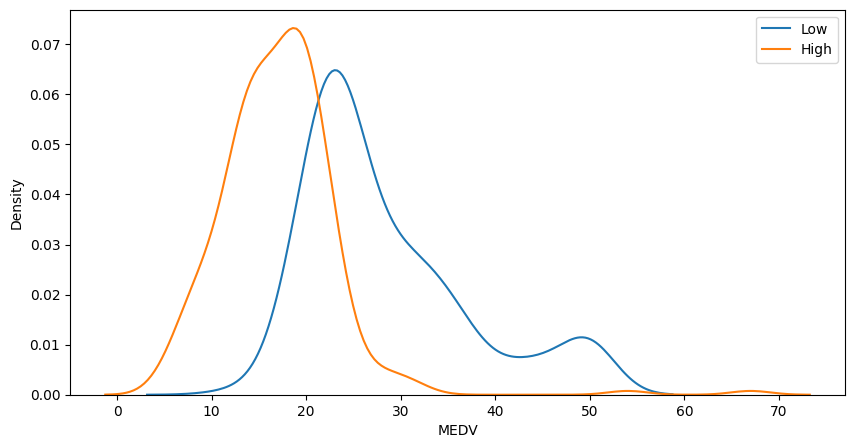

In [135]:
# 지역 빈곤층 지수의 집값에 대한 영향력 kdeplot
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.kdeplot(x=data[data['LSTAT']<data['LSTAT'].median()]['MEDV'], ax=ax)
sns.kdeplot(x=data[data['LSTAT']>=data['LSTAT'].median()]['MEDV'], ax=ax)
plt.legend(['Low', 'High'])
plt.show()

C:\Users\zxcfv\AppData\Local\Temp\ipykernel_9100\1480466335.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



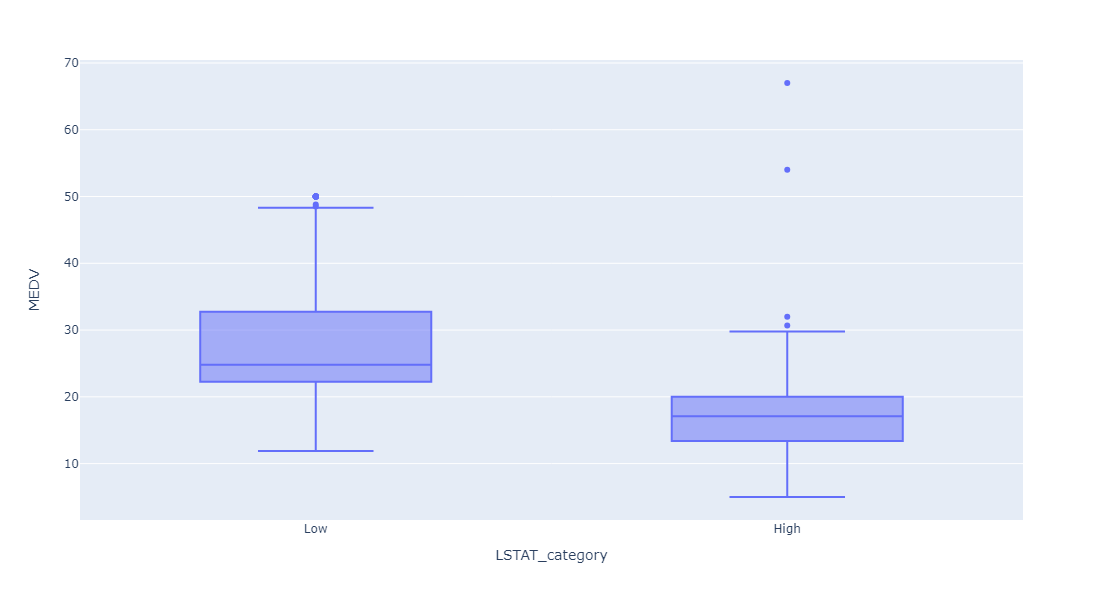

In [136]:
# 지역 빈곤층 지수의 집값에 대한 영향력 boxplot
data['LSTAT_category'] = data['LSTAT'].apply(lambda x: 'Low' if x < data['LSTAT'].median() else 'High')
fig = px.box(data, x='LSTAT_category', y='MEDV', width=400, height=600)
fig.show()

집값과 비례하는 요인으로는
1. 방의 수
2. 25000 평방 피트 넘는 주택지 비율
3. 흑인 지수
4. 고용 센터와의 거리
5. 찰스 강과 접함 여부
순으로 강했고

반비례하는 요인으로는
1. 빈곤층 비율
2. 사용되지 않는 농지 면적
3. 1만 달러당 재산세
4. 학생교사비율
5. 산화질소 농도
6. 고속도로 접근성
7. 범죄율
8. 1940년 이전에 지어진 주택 비율
순으로 강했다.

의외의 분석이라하면 흑인 지수와 1만달러당 재산세, 고속도로 접근성 등이 있다.